In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob


In [2]:
image = cv2.imread('../images/kitty-cat.jpg', 0)

In [3]:
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
K.set_image_dim_ordering('th')

Using Theano backend.
DEBUG: nvcc STDOUT nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
mod.cu
   Creating library C:/Users/Guido/AppData/Local/Theano/compiledir_Windows-10-10.0.14393-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.12-64/tmplpn8da/265abc51f7c376c224983485238ff1a5.lib and object C:/Users/Guido/AppData/Local/Theano/compiledir_Windows-10-10.0.14393-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.12-64/tmplpn8da/265abc51f7c376c224983485238ff1a5.exp

Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5105)
C:\Anaconda2\lib\site-packages\theano\sandbox\cuda\__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [39]:
def onehot_weights():
    patcher_weights = np.zeros((64,8,8), dtype=np.float32)
    for x in range(64):
        patcher_weights[x, x//8, x%8] = 1.
        
from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft
        
def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])
        
def dct_weights():
    return np.expand_dims(np.expand_dims(np.array(dct(np.zeros(64)), dtype=np.float32), axis=1), axis=1)

def dct_layer(in_layer):
    patcher = Convolution2D(64, 8, 8, border_mode='same', 
                            weights=onehot_weights(), 
                            trainable=False, 
                            subsample=(8,8))(in_layer)
    dct = Convolution2D(64, 1, 1, border_mode='same', 
                            weights=dct_weights(), 
                            trainable=False, )(patcher)
    
    
dct_weights().shape

(64L, 1L, 1L)

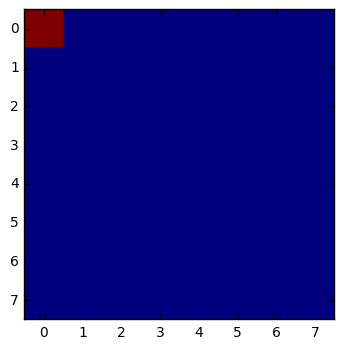

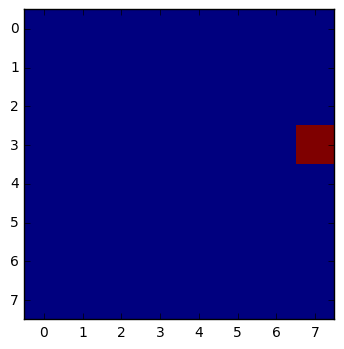

In [40]:
plt.imshow(patcher_weights[0], interpolation='nearest')
plt.show()
plt.imshow(patcher_weights[31], interpolation='nearest')
plt.show()

In [41]:
inputs = Input((1, 64, 64))
dct_layer(inputs)

Exception: You called `set_weights(weights)` on layer "convolution2d_11" with a  weight list of length 64, but the layer was expecting 2 weights. Provided weights: [[[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]]